In [30]:
import requests
response = requests.get('https://en.wikipedia.org/wiki/End_SARS')
response.content
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, 'html5lib')
text = soup.get_text(strip=True)


In [2]:
from textblob import TextBlob
text = TextBlob(text)

In [4]:
text

TextBlob("End SARS - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"8b087be6-922f-4dc0-8e5e-c994fb5e29c9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"End_SARS","wgTitle":"End SARS","wgCurRevisionId":990196888,"wgRevisionId":990196888,"wgArticleId":56194341,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: extra text: authors list","CS1 errors: external links","Articles with short description","Short description is different from Wikidata","Wikipedia semi-protected pages","EngvarB from October 2020","Use dmy dates from October 2020","Pages using multiple image with auto scaled imag

In [5]:
len(text.words)

9445

In [6]:
text.noun_phrases[50:53]

WordList(['human rights', 'nigeria', 'end_sars'])

In [7]:
len(text.sentences)

549

In [8]:
text.tags[5]

('wgBreakFrames', 'NNS')

In [9]:
from nltk.corpus import stopwords

stop_word = stopwords.words('english')

In [10]:
text_count = text.word_counts.items()
len(text_count)

2791

In [11]:
#new text excluding the stop words
new_text = [word for word in text_count if word[0] not in stop_word]

In [12]:
len(new_text)

2689

In [13]:
from operator import itemgetter
sorted_text = sorted(new_text, key= itemgetter(1), reverse = True)

In [14]:
import pandas as pd
top25 = sorted_text[0:26]
df = pd.DataFrame(top25, columns= ['Word', 'Count'])

In [15]:
df

,Word,Count
0,2020,182
1,october,169
2,police,134
3,endsars,130
4,protests,109
5,protesters,101
6,sars,94
7,nigeria,79
8,october2020,61
9,state,56


In [16]:
top200 = sorted_text[0:201]
top200 = dict(top200)

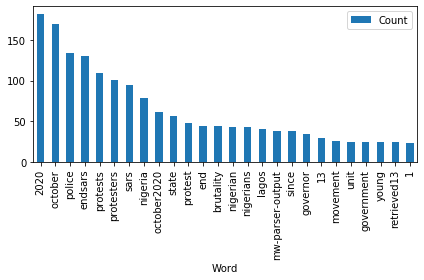

In [17]:
import matplotlib.pyplot as plt
axes = df.plot.bar(x='Word', y='Count')
plt.gcf().tight_layout()

In [33]:
import imageio

mask_image = imageio.imread('star.png')

In [35]:
from wordcloud import WordCloud

wordcloud  = WordCloud(colormap = 'prism', mask = mask_image, background_color = 'white')
wordcloud = wordcloud.generate(text)
wordcloud = wordcloud.to_file('protest_new.png')
%matplotlib
plt.imshow(wordcloud)

Using matplotlib backend: Qt5Agg
